In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hvplot.pandas
import panel as pn
pn.extension('tabulator')

In [64]:
df = pd.read_csv("co2-data.csv")

In [65]:
df = df.fillna(0)
df['gdp_per_capita'] = np.where(df['population']!= 0, df['gdp']/ df['population'], 0)

In [66]:
df["co2"]

0         0.000
1         0.000
2         0.000
3         0.000
4         0.000
          ...  
50593     9.596
50594    11.795
50595    11.115
50596    10.608
50597    11.296
Name: co2, Length: 50598, dtype: float64

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50598 entries, 0 to 50597
Data columns (total 80 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    50598 non-null  object 
 1   year                                       50598 non-null  int64  
 2   iso_code                                   50598 non-null  object 
 3   population                                 50598 non-null  float64
 4   gdp                                        50598 non-null  float64
 5   cement_co2                                 50598 non-null  float64
 6   cement_co2_per_capita                      50598 non-null  float64
 7   co2                                        50598 non-null  float64
 8   co2_growth_abs                             50598 non-null  float64
 9   co2_growth_prct                            50598 non-null  float64
 10  co2_including_luc     

In [68]:
df[(df["country"] == "India")]

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share,gdp_per_capita
21294,India,1850,IND,2.357324e+08,2.233026e+11,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,947.271421
21295,India,1851,IND,2.365359e+08,2.240905e+11,0.000,0.000,0.000,0.000,0.000,...,6.460,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,947.384673
21296,India,1852,IND,2.373184e+08,0.000000e+00,0.000,0.000,0.000,0.000,0.000,...,6.262,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000000
21297,India,1853,IND,2.380798e+08,0.000000e+00,0.000,0.000,0.000,0.000,0.000,...,6.093,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000000
21298,India,1854,IND,2.388436e+08,0.000000e+00,0.000,0.000,0.000,0.000,0.000,...,5.941,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21461,India,2017,IND,1.354196e+09,8.275647e+12,121.047,0.089,2434.868,51.052,2.142,...,4.641,0.032,0.032,0.070,0.006,3215.07,3242.17,-145.793,-5.988,6111.115942
21462,India,2018,IND,1.369003e+09,8.835758e+12,138.965,0.102,2600.447,165.578,6.800,...,4.674,0.033,0.033,0.072,0.006,3360.56,3388.92,-168.744,-6.489,6454.153718
21463,India,2019,IND,1.383112e+09,0.000000e+00,143.664,0.104,2626.459,26.013,1.000,...,4.707,0.033,0.034,0.073,0.006,3363.60,3394.87,-158.946,-6.052,0.000000
21464,India,2020,IND,1.396387e+09,0.000000e+00,122.908,0.088,2445.012,-181.447,-6.908,...,4.737,0.034,0.035,0.075,0.006,0.00,0.00,-168.131,-6.877,0.000000


In [76]:
population_data = df[(df["population"] != 0)].sort_values(by="year",ascending=True)
population_data["year"] = population_data["year"].astype(int)
population_data["population"] = pd.to_numeric(population_data["population"], downcast='integer')
population_data["population"]

/home/het/Desktop/Software Lab/project/sample_project/env/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:375: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


41278        4882
33337    11396206
28832      357845
34930     1946330
41006       13230
           ...   
17545     2341185
45144    23859904
17193      304038
18295    32833036
50597    15993525
Name: population, Length: 40008, dtype: int64

In [77]:
population_data = population_data[["population","year","country"]]
population_data

,population,year,country
41278,4882,1750,Singapore
33337,11396206,1750,North America
28832,357845,1750,Mauritania
34930,1946330,1750,Oceania
41006,13230,1750,Sierra Leone
...,...,...,...
17545,2341185,2021,Gabon
45144,23859904,2021,Taiwan
17193,304038,2021,French Polynesia
18295,32833036,2021,Ghana


Text(0, 0.5, 'Population in Billions')

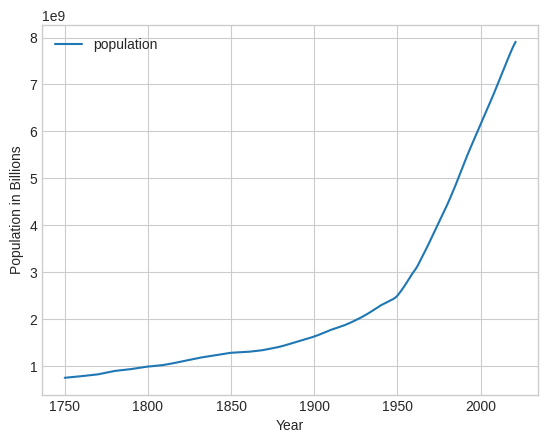

In [70]:
ax = x.plot(x="year",y="population")
plt.xlabel("Year")
plt.ylabel("Population in Billions")

In [71]:
"United States" in list(df["country"])

True

In [72]:
continents = ["Asia", "North America" , "South America", "Africa", "Australia", "Europe", "Antartica"]
big_countries = ["United States","China","India", "Russia","United Kingdom", "Germany", "France", ]

countries_df = df[df["country"].isin(big_countries)].sort_values(by="year",ascending=True)
countries_df = countries_df[["country","year","co2"]]
countries_df["year"] = countries_df["year"].astype(int)
countries_df

,country,year,co2
47665,United Kingdom,1750,9.351
47666,United Kingdom,1751,9.351
47667,United Kingdom,1752,9.354
47668,United Kingdom,1753,9.354
47669,United Kingdom,1754,9.358
...,...,...,...
38579,Russia,2021,1755.547
47936,United Kingdom,2021,346.773
18123,Germany,2021,674.754
21465,India,2021,2709.684


In [73]:
plt.style.use('seaborn-whitegrid')

/tmp/ipykernel_3479/2414357448.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


/tmp/ipykernel_3479/929623826.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(selected_year_data["country"],rotation=90)


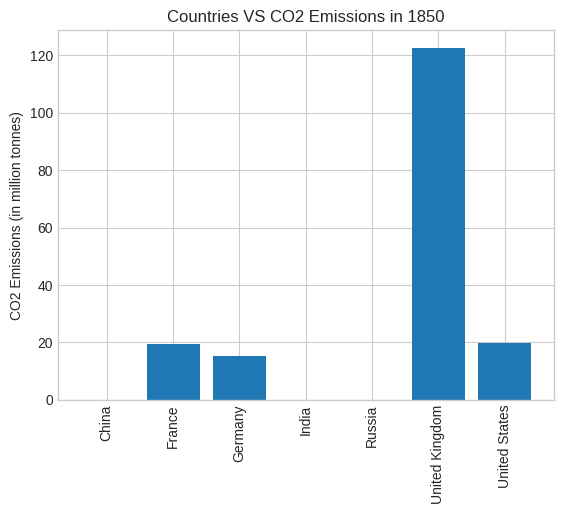

In [74]:
#Big Countries contribution for CO2

def create_matplotlib_plot_country(value):
    fig, ax = plt.subplots()
    selected_year_data = countries_df[countries_df["year"] == value]
    selected_year_data = selected_year_data.sort_values(by="country")
        
    ax.bar(selected_year_data["country"], selected_year_data["co2"])
    ax.set_xticklabels(selected_year_data["country"],rotation=90)
    ax.set_title(f'Countries VS CO2 Emissions in {value}')
    ax.set_ylabel("CO2 Emissions (in million tonnes)")
    return fig


def update_plot_country(event):
    value = event.new
    fig = create_matplotlib_plot_country(value)
    mpl_pane.object = fig

slider = pn.widgets.FloatSlider(start=1750, end=2021, step=2, value=1850)
slider.param.watch(update_plot_country, 'value')

initial_plot_c = create_matplotlib_plot_country(slider.value)
mpl_pane = pn.pane.Matplotlib(initial_plot_c, tight=True)


In [ ]:
#creating graph of population

def create_matplotlib_plot(value):
    fig, ax = plt.subplots()
    selected_year_data = population_data[population_data["year"] == value]
    selected_year_data = selected_year_data.sort_values(by="country")
        
        
    return fig

def update_plot(event):
    value = event.new
    fig = create_matplotlib_plot(value)
    mpl_pane2.object = fig

slider.param.watch(update_plot, 'value')

initial_plot = create_matplotlib_plot(slider.value)
mpl_pane2 = pn.pane.Matplotlib(initial_plot, tight=True)

app = pn.Column(
    slider,
    mpl_pane,
    mpl_pane2,
)

app.show()